# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

# <div style='padding:7px;background-color:Maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>CLassification Modeling<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [40]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

from sklearn import svm

import pickle



## <span style="color:Aqua;">Reading model dataset:</span>

In [41]:
df = pd.read_feather('clustered.feather')

In [42]:
df.sample(3)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,credit_score,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,High_Spent_Large_Value_Payments,High_Spent_Medium_Value_Payments,High_Spent_Small_Value_Payments,Low_Spent_Large_Value_Payments,Low_Spent_Medium_Value_Payments,Low_Spent_Small_Value_Payments,Cluster
20028,6,6,0,12,11,7.0000,1,2,1,7.0000,2,5287.7917,10.2246,14.7774,12.5917,6.5114,37.3197,3.4657,200.3122,27,0.0000,10.3227,27.7030,0.3805,9.1423,2.3361,0.9009,1.2077,3.5084,0.1326,27.2249,-10.3854,56.8891,-0.0297,27.0245,6.8156,0,0,1,0,0,0,1
76268,3,4,4,34,20,2.0000,2,0,2,1.0000,1,1264.7236,9.2002,12.0676,9.8603,2.9057,10.0150,3.4012,122.8757,-39,5.9791,5.5029,18.7774,0.5296,7.2626,1.8587,1.0308,2.8460,1.7185,0.1344,11.3226,-7.7290,55.2799,0.1612,11.5213,1.0040,0,0,0,0,1,0,0
38836,4,4,6,25,15,12.0000,1,2,0,2.0000,3,2136.4220,13.4018,13.4189,10.8782,8.4318,46.1279,3.5553,116.8171,-39,10.0243,8.1606,20.6089,0.5357,7.8904,1.7400,1.0155,2.4866,0.8562,0.1554,31.4127,-8.8351,41.3959,-0.0865,31.7489,3.0429,0,0,1,0,0,0,1


In [43]:
continuous_columns = [
      'disposable_income', 'age_boxcox', 
    'annual_income_boxcox', 'monthly_inhand_salary_boxcox', 'interest_rate_boxcox', 
    'outstanding_debt_square', 'credit_utilization_ratio_log', 'credit_history_age_boxcox', 
    'total_emi_per_month_square', 'amount_invested_monthly_boxcox', 'monthly_balance_boxcox', 
    'credit_limit_change_rate_exp', 'debt_income_ratio_log', 'loan_income_ratio_month_boxcox', 
    'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox', 
    'investment_to_income_ratio_square', 'total_credit_exposure_boxcox', 
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec', 'income_stability_boxcox', 
    'total_liability_boxcox', 'debt_paytime_log','changed_credit_limit_cube'
]

Ordinal_columns = [
    'num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date', 'num_credit_inquiries',
    'num_of_delayed_payment', 'credit_mix', 'payment_of_min_amount', 
      'age_group', 'Cluster' ,'credit_inquiry_per_loan','High_Spent_Large_Value_Payments', 'High_Spent_Medium_Value_Payments',
       'High_Spent_Small_Value_Payments', 'Low_Spent_Large_Value_Payments',
       'Low_Spent_Medium_Value_Payments', 'Low_Spent_Small_Value_Payments'
]

print(len(continuous_columns) + len(Ordinal_columns))

42


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   num_bank_accounts                          100000 non-null  int8   
 1   num_credit_card                            100000 non-null  int8   
 2   num_of_loan                                100000 non-null  int8   
 3   delay_from_due_date                        100000 non-null  int8   
 4   num_of_delayed_payment                     100000 non-null  int8   
 5   num_credit_inquiries                       100000 non-null  float64
 6   credit_mix                                 100000 non-null  int8   
 7   payment_of_min_amount                      100000 non-null  int8   
 8   credit_score                               100000 non-null  int8   
 9   credit_inquiry_per_loan                    100000 non-null  float64
 10  age_group

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [45]:
x = df.drop('credit_score',axis=1)
y = df[['credit_score']]

In [46]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
num_bank_accounts,100000.0000,5.3688,2.5933,0.0000,3.0000,5.0000,7.0000,11.0000
num_credit_card,100000.0000,5.5336,2.0671,0.0000,4.0000,5.0000,7.0000,11.0000
num_of_loan,100000.0000,3.5329,2.4464,0.0000,2.0000,3.0000,5.0000,9.0000
delay_from_due_date,100000.0000,21.0814,14.8046,0.0000,10.0000,18.0000,28.0000,62.0000
num_of_delayed_payment,100000.0000,13.3131,6.2372,0.0000,9.0000,14.0000,18.0000,25.0000
num_credit_inquiries,100000.0000,5.7983,3.8678,0.0000,3.0000,5.0000,8.0000,17.0000
credit_mix,100000.0000,1.0662,0.7329,0.0000,1.0000,1.0000,2.0000,2.0000
payment_of_min_amount,100000.0000,1.1666,0.9231,0.0000,0.0000,2.0000,2.0000,2.0000
credit_inquiry_per_loan,100000.0000,1.8403,1.2931,0.0000,1.0000,2.0000,2.0000,12.0000
age_group,100000.0000,2.1350,1.0752,0.0000,1.0000,2.0000,3.0000,4.0000


In [47]:
y.describe()

,credit_score
count,100000.0000
mean,0.8883
std,0.6751
min,0.0000
25%,0.0000
50%,1.0000
75%,1.0000
max,2.0000


In [48]:
y.value_counts()

credit_score
1               53174
0               28998
2               17828
Name: count, dtype: int64

In [49]:
original_features=['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date','num_of_delayed_payment',
     'num_credit_inquiries', 'credit_mix','payment_of_min_amount',  'age_boxcox',
     'total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',]

all_features = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
    'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox','total_credit_exposure_boxcox',
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec','debt_paytime_log','interest_rate_boxcox',
    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',
             'income_stability_boxcox','total_liability_boxcox','investment_to_income_ratio_square',
             'outstanding_debt_square','credit_inquiry_per_loan','changed_credit_limit_cube']

revised_features = ['num_bank_accounts','num_credit_card','num_of_loan','num_of_delayed_payment', 'delay_from_due_date',
                    'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
                    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox',
                    'annual_income_boxcox','total_liability_boxcox','outstanding_debt_square','savings_rate_rec']

imp_fea = ['credit_mix','outstanding_debt_square','credit_utilization_ratio_log','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox','total_emi_per_month_square',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log','amount_invested_monthly_boxcox','savings_rate_rec',
    'income_stability_boxcox','age_boxcox','changed_credit_limit_cube']

new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','delay_from_due_date','credit_mix','num_of_delayed_payment','outstanding_debt_square',
           'credit_history_age_boxcox','monthly_balance_boxcox','High_Spent_Large_Value_Payments', 'High_Spent_Medium_Value_Payments',
       'High_Spent_Small_Value_Payments', 'Low_Spent_Large_Value_Payments',
       'Low_Spent_Medium_Value_Payments', 'Low_Spent_Small_Value_Payments']

## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [50]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [51]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(107031, 42) ---- (107031, 1)
(30000, 42) ---- (30000, 1)


In [52]:
x_test.sample(2)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,High_Spent_Large_Value_Payments,High_Spent_Medium_Value_Payments,High_Spent_Small_Value_Payments,Low_Spent_Large_Value_Payments,Low_Spent_Medium_Value_Payments,Low_Spent_Small_Value_Payments,Cluster
11863,7,5,5,26,15,11.0000,1,2,2.0000,3,8213.1059,12.5466,15.5596,13.5844,6.0230,25.6379,3.5264,127.8916,87,16.0497,13.2243,25.1912,0.4991,9.1369,1.8409,0.8773,2.3316,1.0544,0.1417,21.1314,-11.0920,49.8049,-0.0055,23.3427,0.9329,0,1,0,0,0,0,1
16861,5,3,4,9,10,4.0000,1,2,1.0000,3,2458.3427,14.2236,13.2959,11.1113,2.4772,36.7985,3.4012,132.3814,-53,8.1073,8.8135,20.3238,0.6047,8.1348,1.8736,0.9282,1.6988,0.7704,0.1596,26.9541,-8.9704,39.2478,0.1101,27.2050,3.0103,0,0,1,0,0,0,1


In [53]:
y_test.sample(2)

,credit_score
37517,1
54832,1


## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train[continuous_columns])
x_test_scaled = scaler.transform(x_test[continuous_columns])

In [55]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

In [56]:
x_train_scaled_continuous = pd.DataFrame(x_train_scaled, columns=continuous_columns)
x_test_scaled_continuous = pd.DataFrame(x_test_scaled, columns=continuous_columns)

In [57]:
x_train_scaled_df = pd.concat([x_train_scaled_continuous.reset_index(drop=True), x_train[Ordinal_columns].reset_index(drop=True)], axis=1)
x_test_scaled_df = pd.concat([x_test_scaled_continuous.reset_index(drop=True), x_test[Ordinal_columns].reset_index(drop=True)], axis=1)

In [58]:
x_train_scaled_df

,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,changed_credit_limit_cube,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_credit_inquiries,num_of_delayed_payment,credit_mix,payment_of_min_amount,age_group,Cluster,credit_inquiry_per_loan,High_Spent_Large_Value_Payments,High_Spent_Medium_Value_Payments,High_Spent_Small_Value_Payments,Low_Spent_Large_Value_Payments,Low_Spent_Medium_Value_Payments,Low_Spent_Small_Value_Payments
0,0.8432,0.2145,0.9431,0.9492,0.4786,0.2627,0.7005,0.9016,0.6741,0.8000,0.7280,0.3004,0.6881,0.5800,0.7782,0.4076,0.5409,0.3548,0.3308,0.2090,0.6949,0.5506,0.3710,0.1951,0.7520,3,7,3,7,3.0000,14,2,0,1,1,1.0000,0,0,0,1,0,0
1,0.5726,0.3496,0.8083,0.8222,0.4786,0.4413,0.7565,0.9761,0.0000,0.8224,1.0000,0.4611,0.8018,0.9870,0.7351,0.3919,1.0000,0.5328,0.5234,0.3380,0.4222,0.4714,0.4791,1.0000,0.0569,4,3,0,3,2.0000,14,2,0,2,1,2.0000,1,0,0,0,0,0
2,0.2725,0.6130,0.5419,0.5901,0.2063,0.4663,0.6107,0.9717,0.3891,0.4592,0.5071,0.4199,0.5365,0.5416,0.8931,0.3523,0.4660,0.4120,0.5471,0.5261,0.5839,0.4596,0.5186,0.4758,0.3943,1,3,3,11,4.0000,11,2,1,3,1,1.0000,0,0,1,0,0,0
3,0.4560,0.5449,0.7376,0.7561,0.9266,0.5414,0.5465,0.2660,0.5236,0.6622,0.7118,0.6127,0.6064,0.5461,0.6189,0.7210,0.5125,0.4459,0.6188,0.3455,0.5302,0.4279,0.5962,0.4387,0.8455,5,4,4,8,5.0000,16,1,2,2,1,1.0000,0,0,1,0,0,0
4,0.4875,0.7427,0.7409,0.7751,0.3398,0.4283,0.3275,0.3333,0.4325,0.6389,0.7142,0.6526,0.6560,0.6308,0.4081,0.6149,0.6120,0.3968,0.5073,0.2873,0.6107,0.6049,0.4870,0.4281,0.6992,7,4,2,9,5.0000,13,1,1,3,1,2.0000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107026,0.4349,0.8451,0.7119,0.7400,0.2063,0.2920,0.5158,0.9540,0.4595,0.5292,0.8421,0.3692,0.5712,0.5862,0.6087,0.1688,0.2045,0.3194,0.3621,0.3597,0.7802,0.4960,0.3584,0.3177,0.8455,5,7,2,4,0.0000,3,2,1,3,1,0.0000,0,0,0,0,0,0
107027,0.2635,0.8650,0.5467,0.5796,0.2992,0.2355,0.4546,0.9708,0.4045,0.4039,0.5599,0.3442,0.4917,0.5166,0.5853,0.2819,0.2829,0.3514,0.2950,0.4846,0.7024,0.2984,0.2917,0.2966,0.3293,5,4,4,8,2.0000,7,2,0,3,1,1.0000,0,0,0,0,0,0
107028,0.2613,0.6579,0.5063,0.5747,0.1510,0.5146,0.6952,0.8908,0.3262,0.6991,0.6389,0.1416,0.4893,0.5987,0.9042,0.3834,0.5848,0.7896,0.5943,0.5756,0.2430,0.6359,0.5586,0.5444,0.4959,1,5,2,6,4.0342,12,2,0,3,1,2.0000,0,0,0,0,0,0
107029,0.4200,0.2655,0.6908,0.7268,0.3216,0.2145,0.6661,0.8193,0.3338,0.6927,0.6629,0.4335,0.6826,0.6851,0.8085,0.2520,0.3925,0.5214,0.2687,0.4148,0.4365,0.5540,0.2537,0.3072,0.7073,2,3,1,6,6.2144,4,2,0,1,1,3.0000,0,0,0,0,0,0


In [59]:
x_test_scaled_df

,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,changed_credit_limit_cube,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_credit_inquiries,num_of_delayed_payment,credit_mix,payment_of_min_amount,age_group,Cluster,credit_inquiry_per_loan,High_Spent_Large_Value_Payments,High_Spent_Medium_Value_Payments,High_Spent_Small_Value_Payments,Low_Spent_Large_Value_Payments,Low_Spent_Medium_Value_Payments,Low_Spent_Small_Value_Payments
0,0.2851,0.4500,0.5419,0.5994,0.4467,0.5389,0.4055,0.7340,0.0000,0.5068,0.7191,0.4713,0.5657,0.9636,0.8633,0.3068,0.7293,0.4638,0.6157,0.4770,0.5048,0.5674,0.5716,1.0000,0.3943,1,5,0,9,0.0000,6,2,0,2,1,0.0000,1,0,0,0,0,0
1,0.1301,0.1270,0.2073,0.3288,0.6705,0.9764,0.7288,0.2870,0.3515,0.3145,0.3283,0.8317,0.1951,0.3346,0.5257,0.7151,0.4294,0.5648,0.9824,0.8266,0.3903,0.7083,0.9306,0.6865,0.6748,8,7,6,18,9.0000,17,0,2,0,1,2.0000,0,0,0,0,0,1
2,0.7222,0.7003,0.8927,0.9007,0.4786,0.4855,0.0532,0.5178,0.6428,0.7474,0.3813,0.3470,0.8086,0.5662,0.4266,0.0000,0.0000,0.3606,0.5630,0.0820,0.6823,0.5134,0.5597,0.3598,0.6016,5,2,2,3,3.0000,0,2,0,3,1,1.0000,0,0,0,0,0,1
3,0.1546,0.5678,0.3073,0.3895,0.9639,0.7116,0.5129,0.6144,0.2341,0.1897,0.5028,0.5055,0.3429,0.5842,0.5481,0.4737,0.6120,0.2580,0.7700,0.6977,0.9701,0.4249,0.7243,0.7074,0.3943,6,6,2,15,11.0000,13,1,2,2,1,4.0000,0,0,0,0,0,1
4,0.5114,0.3753,0.7805,0.7936,0.5092,0.3982,0.7288,0.6539,0.6130,0.6782,0.8474,0.4756,0.6794,0.5073,0.9085,0.0000,0.0000,0.4163,0.4794,0.3546,0.5766,0.4276,0.4801,0.3223,0.3333,1,2,4,1,4.0000,0,2,0,2,1,1.0000,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.3054,0.9238,0.5948,0.6218,0.6202,0.3815,0.1990,0.8128,0.0000,0.4414,0.6802,0.1522,0.5433,0.9664,0.5678,0.4013,1.0000,0.3499,0.4579,0.3813,0.7057,0.3108,0.4184,0.9741,0.4959,4,7,0,8,4.0000,12,1,0,4,1,4.0000,0,1,0,0,0,0
29996,0.1900,0.7635,0.3994,0.4710,0.3776,0.5325,0.3275,0.2126,0.4147,0.3466,0.3297,0.8750,0.3628,0.4032,0.5416,0.7669,0.4924,0.4060,0.6093,0.5786,0.5941,0.4785,0.5802,0.4930,0.2642,5,6,4,28,4.0000,15,1,2,3,1,1.0000,0,1,0,0,0,0
29997,0.0948,0.4742,0.1081,0.1796,0.7633,0.8599,0.3672,0.3986,0.2417,0.3093,0.3920,0.7252,0.1306,0.3641,0.2455,0.6987,0.5706,0.8606,0.8912,0.8286,0.2133,0.0000,0.8415,0.7472,0.2764,10,8,5,21,6.0000,23,0,2,2,1,1.0000,0,0,0,1,0,0
29998,0.1334,0.4980,0.2126,0.3400,0.7633,0.7577,0.1040,0.0835,0.3708,0.5609,0.4155,0.7575,0.1854,0.3169,0.2192,1.0000,0.4121,1.0000,0.8077,0.6840,0.1506,0.8005,0.7659,0.6095,0.7520,8,8,6,20,9.0000,16,0,2,2,1,2.0000,0,0,0,0,0,1


## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [60]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    

    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)

Accuracy Test  - 0.7559666666666667
Accuracy Train - 1.0

Precision Test  - 0.7581549605195839
Precision Train - 1.0

Recall Test  - 0.7559666666666667
Recall Train - 1.0

F1_score Test  - 0.7565770983032385
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 6739  1887   179]
 [ 2171 12013  1689]
 [  135  1260  3927]]
Confusion Matrix Train -- 
[[35701     0     0]
 [    0 34866     0]
 [    0     0 36464]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      8805
           1       0.79      0.76      0.77     15873
           2       0.68      0.74      0.71      5322

    accuracy                           0.76     30000
   macro avg       0.74      0.75      0.75     30000
weighted avg       0.76      0.76      0.76     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35701
           1       1.00      1.00      1.0

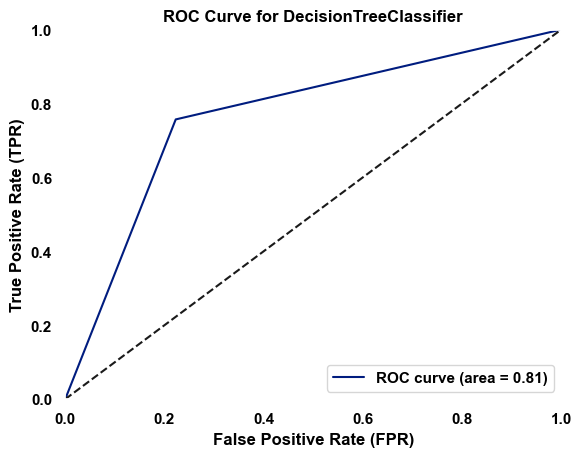

----------------------------------------


In [62]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','payment_behaviour','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log',
    'age_boxcox',]

new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','delay_from_due_date','credit_mix','num_of_delayed_payment','outstanding_debt_square',
           'credit_history_age_boxcox','monthly_balance_boxcox']


DT_Classifier = DecisionTreeClassifier()
evaluate_model(DT_Classifier, x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

                         Feature  Importance
9        outstanding_debt_square      0.2009
7                     credit_mix      0.1981
10     credit_history_age_boxcox      0.1258
4           interest_rate_boxcox      0.0919
11        monthly_balance_boxcox      0.0679
6            delay_from_due_date      0.0628
1   monthly_inhand_salary_boxcox      0.0559
0           annual_income_boxcox      0.0526
8         num_of_delayed_payment      0.0502
3                num_credit_card      0.0363
2              num_bank_accounts      0.0327
5                    num_of_loan      0.0250


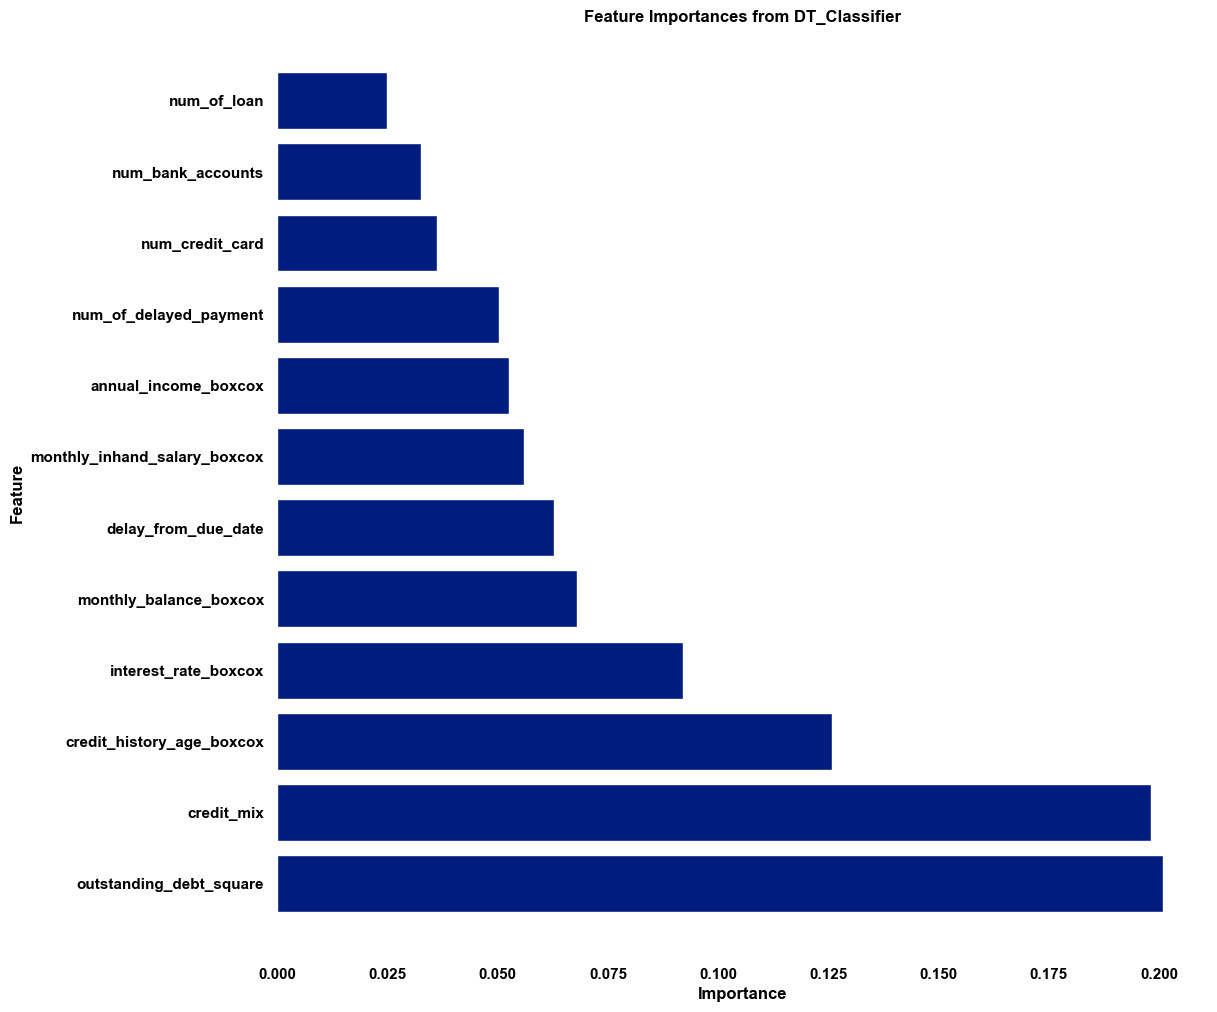

In [67]:
feature_importances = DT_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DT_Classifier')
plt.show()

Accuracy Test  - 0.8071666666666667
Accuracy Train - 1.0

Precision Test  - 0.8108304927940129
Precision Train - 1.0

Recall Test  - 0.8071666666666667
Recall Train - 1.0

F1_score Test  - 0.807434859533153
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 7549  1188    68]
 [ 2041 12368  1464]
 [   27   997  4298]]
Confusion Matrix Train -- 
[[35701     0     0]
 [    0 34866     0]
 [    0     0 36464]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      8805
           1       0.85      0.78      0.81     15873
           2       0.74      0.81      0.77      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.81      0.80     30000
weighted avg       0.81      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35701
           1       1.00      1.00      1.00

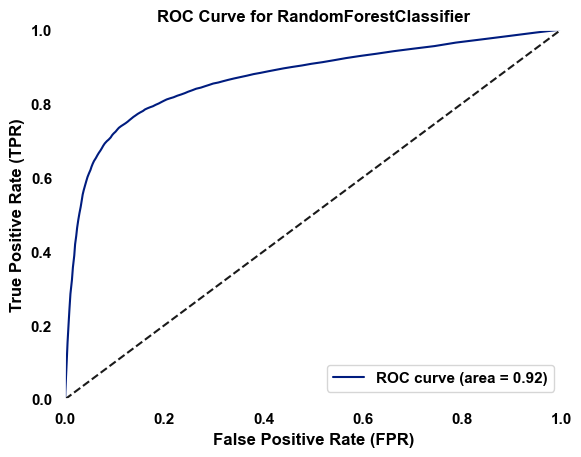

----------------------------------------


In [64]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment',]

RF_Classifier = RandomForestClassifier(n_estimators=100,random_state=42)
evaluate_model(RF_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

                         Feature  Importance
9        outstanding_debt_square      0.1547
4           interest_rate_boxcox      0.1206
10     credit_history_age_boxcox      0.1141
7                     credit_mix      0.1131
6            delay_from_due_date      0.0940
11        monthly_balance_boxcox      0.0694
1   monthly_inhand_salary_boxcox      0.0665
0           annual_income_boxcox      0.0649
8         num_of_delayed_payment      0.0576
2              num_bank_accounts      0.0560
3                num_credit_card      0.0485
5                    num_of_loan      0.0405


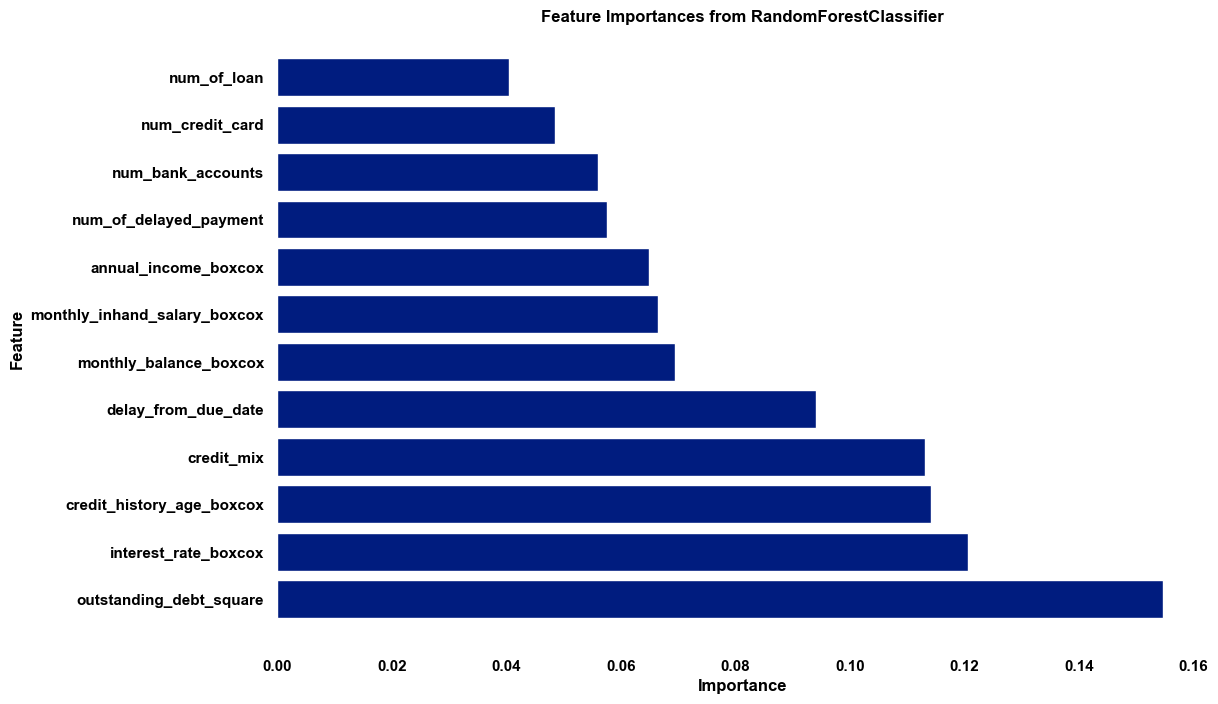

In [68]:
feature_importances = RF_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()


In [69]:
GB_Classifier = GradientBoostingClassifier(n_estimators=100,random_state=42,learning_rate=0.9)
evaluate_model(GB_Classifier, x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

Accuracy Test  - 0.7942
Accuracy Train - 0.9688173749101668

Precision Test  - 0.7972301514266936
Precision Train - 0.9689510754557867

Recall Test  - 0.7942
Recall Train - 0.9688173749101668

F1_score Test  - 0.7945377957729065
F1_score Train - 0.9686381119032555

Confusion Matrix Test  -- 
[[ 7331  1383    91]
 [ 2133 12274  1466]
 [   40  1061  4221]]
Confusion Matrix Train -- 
[[35183   464    69]
 [ 1347 32498  1077]
 [   12   372 36121]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      8805
           1       0.83      0.77      0.80     15873
           2       0.73      0.79      0.76      5322

    accuracy                           0.79     30000
   macro avg       0.78      0.80      0.79     30000
weighted avg       0.80      0.79      0.79     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     35716
      

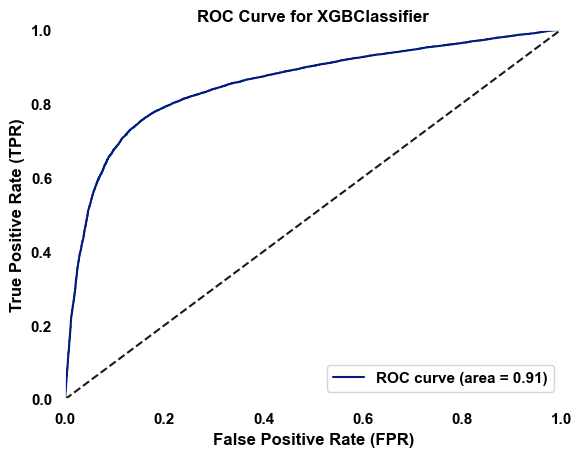

----------------------------------------


In [ ]:
xgb_fea = ['credit_mix','outstanding_debt_square','num_of_loan','interest_rate_boxcox','num_credit_card','num_bank_accounts',
    'num_of_delayed_payment','delay_from_due_date','monthly_inhand_salary_boxcox','credit_history_age_boxcox','monthly_balance_boxcox']

# [["Annual_Income", "Monthly_Inhand_Salary", 
#                    "Num_Bank_Accounts", "Num_Credit_Card", 
#                    "Interest_Rate", "Num_of_Loan", 
#                    "Delay_from_due_date", "Num_of_Delayed_Payment", 
#                    "Credit_Mix", "Outstanding_Debt", 
#                    "Credit_History_Age", "Monthly_Balance"]]

xgb_Classifier = xg.XGBClassifier(learning_rate=.96,max_depth=8,min_child_weight=4,subsample=.9,alpha=.6,colsample_bytree=.9,random_state=42)
evaluate_model(xgb_Classifier, x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

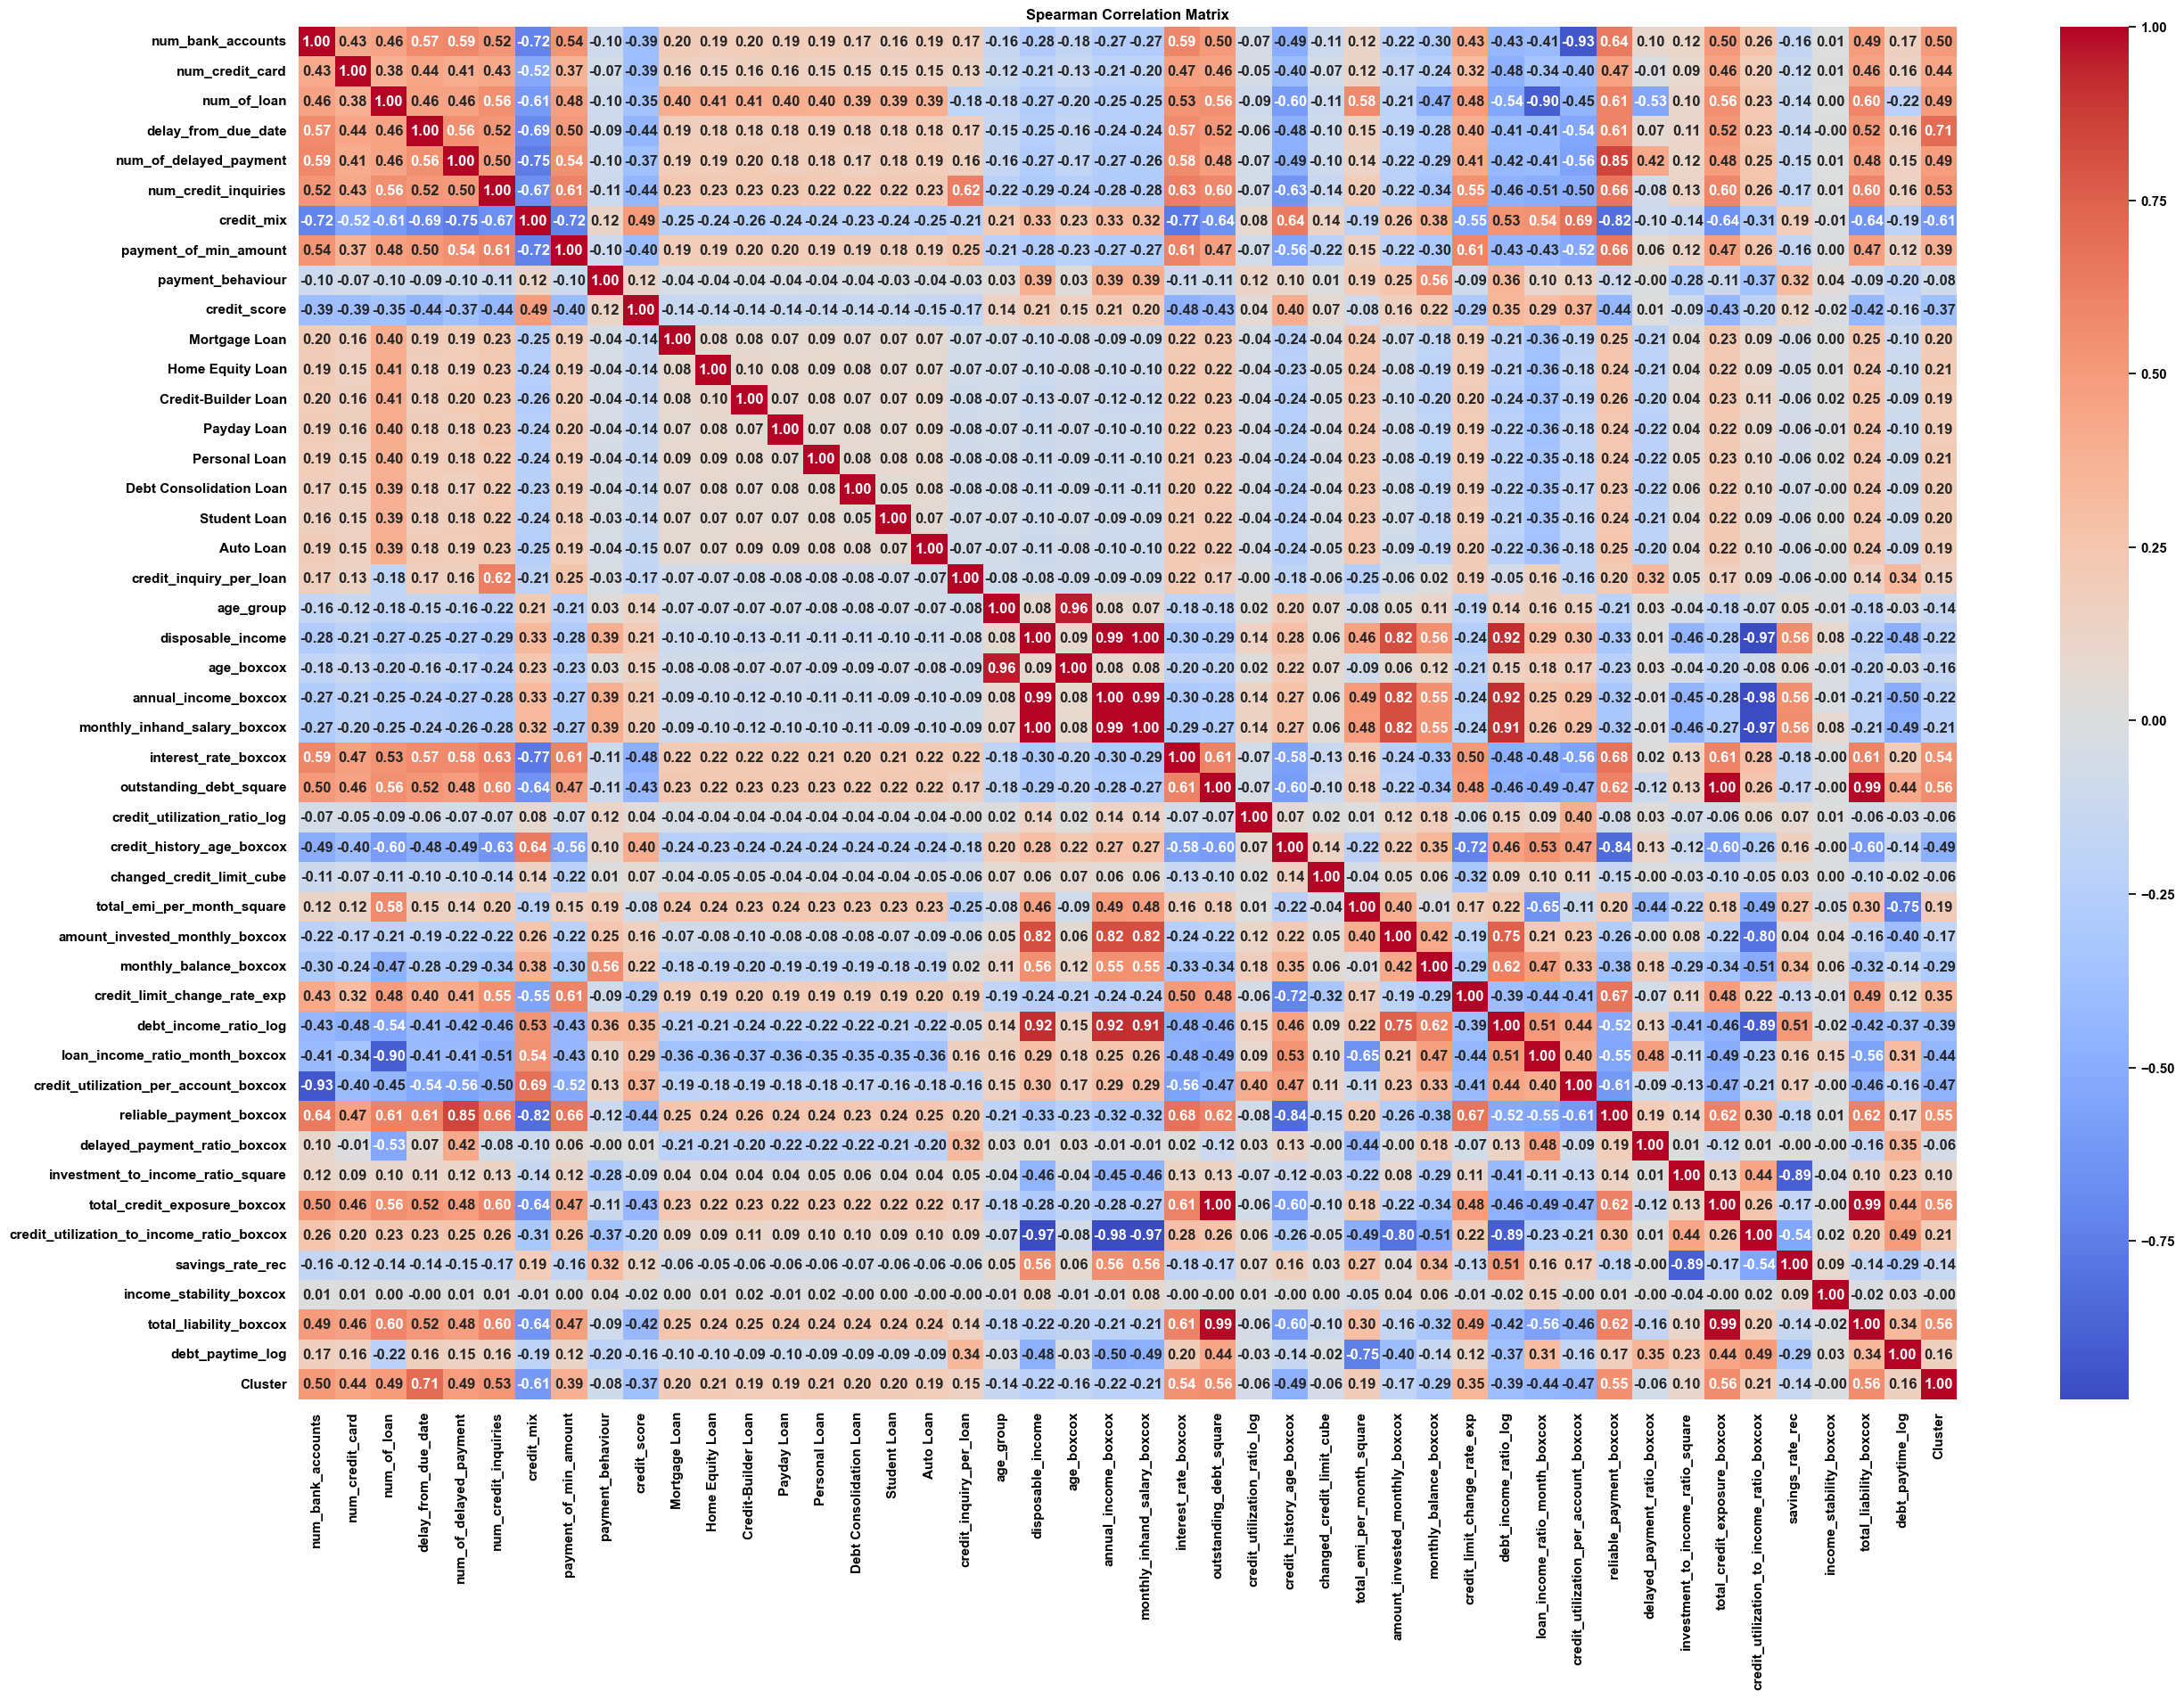

In [49]:
plt.figure(figsize=(30,20))
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

                                      Feature  Importance
31                                 credit_mix      0.2970
5                     outstanding_debt_square      0.1175
6                credit_utilization_ratio_log      0.0517
4                        interest_rate_boxcox      0.0472
32                      payment_of_min_amount      0.0457
22                     total_liability_boxcox      0.0370
26                            num_credit_card      0.0356
36                    credit_inquiry_per_loan      0.0353
25                          num_bank_accounts      0.0291
18               total_credit_exposure_boxcox      0.0284
35                                    Cluster      0.0262
30                     num_of_delayed_payment      0.0175
28                        delay_from_due_date      0.0147
29                       num_credit_inquiries      0.0147
33                          payment_behaviour      0.0142
11               credit_limit_change_rate_exp      0.0137
13            

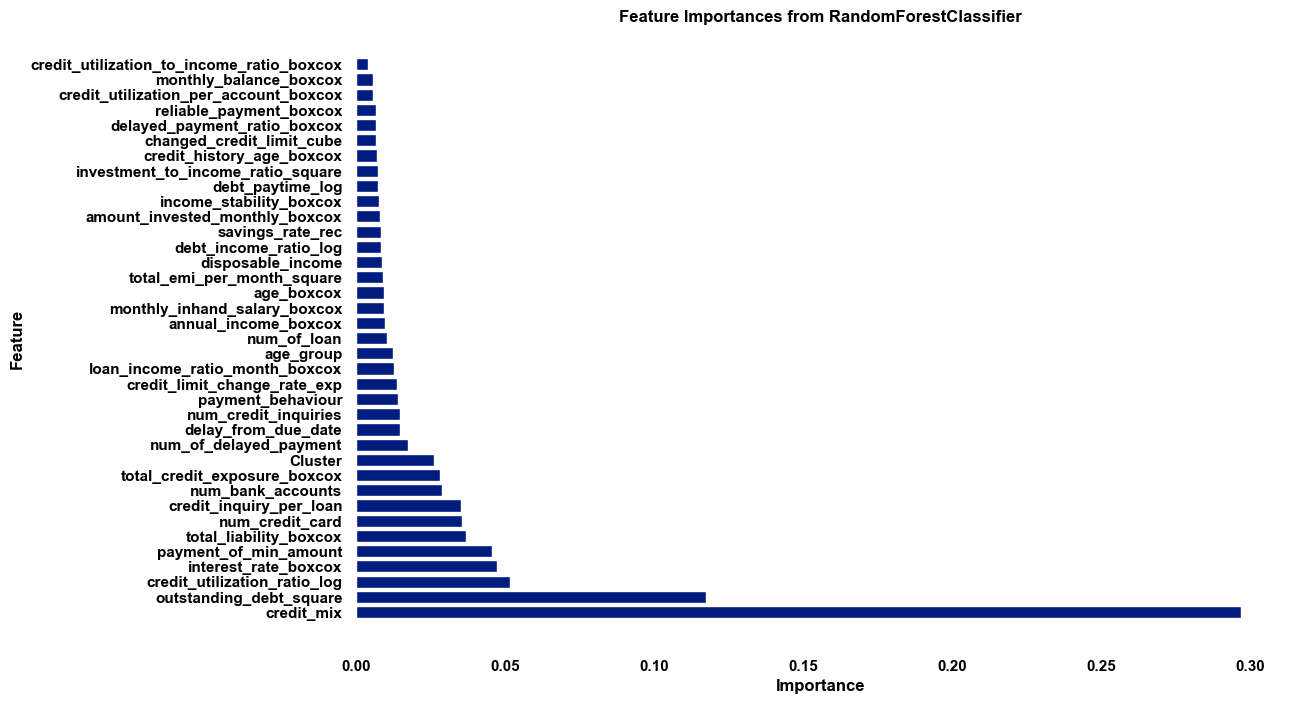

In [50]:
# Get feature importances
feature_importances = xgb_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

In [53]:
x_train.columns

Index(['num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries',
       'credit_mix', 'payment_of_min_amount', 'payment_behaviour',
       'credit_inquiry_per_loan', 'disposable_income', 'age_boxcox',
       'annual_income_boxcox', 'monthly_inhand_salary_boxcox',
       'interest_rate_boxcox', 'outstanding_debt_square',
       'credit_utilization_ratio_log', 'credit_history_age_boxcox',
       'changed_credit_limit_cube', 'total_emi_per_month_square',
       'amount_invested_monthly_boxcox', 'monthly_balance_boxcox',
       'credit_limit_change_rate_exp', 'debt_income_ratio_log',
       'loan_income_ratio_month_boxcox',
       'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox',
       'delayed_payment_ratio_boxcox', 'investment_to_income_ratio_square',
       'total_credit_exposure_boxcox',
       'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec',
       'income_stability_boxcox',

Accuracy Test  - 0.8039
Accuracy Train - 1.0

Precision Test  - 0.8055071512041023
Precision Train - 1.0

Recall Test  - 0.8039
Recall Train - 1.0

F1_score Test  - 0.804117666952506
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 7344  1426    35]
 [ 1937 12547  1389]
 [    6  1090  4226]]
Confusion Matrix Train -- 
[[35716     0     0]
 [    0 34922     0]
 [    0     0 36505]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      8805
           1       0.83      0.79      0.81     15873
           2       0.75      0.79      0.77      5322

    accuracy                           0.80     30000
   macro avg       0.79      0.81      0.80     30000
weighted avg       0.81      0.80      0.80     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35716
           1       1.00      1.00      1.00     34922
           2 

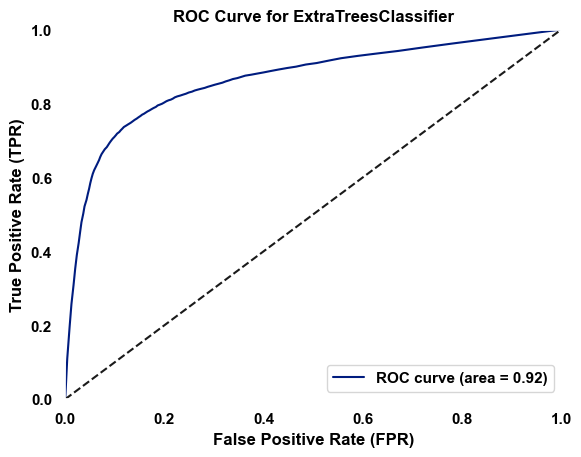

----------------------------------------


In [365]:
ET_Classifier =ExtraTreesClassifier(random_state=42,criterion='entropy')
evaluate_model(ET_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

                                      Feature  Importance
31                                 credit_mix      0.0824
32                      payment_of_min_amount      0.0706
4                        interest_rate_boxcox      0.0555
18               total_credit_exposure_boxcox      0.0496
28                        delay_from_due_date      0.0394
5                     outstanding_debt_square      0.0360
26                            num_credit_card      0.0343
29                       num_credit_inquiries      0.0330
22                     total_liability_boxcox      0.0322
25                          num_bank_accounts      0.0313
15                    reliable_payment_boxcox      0.0310
7                   credit_history_age_boxcox      0.0307
11               credit_limit_change_rate_exp      0.0303
30                     num_of_delayed_payment      0.0269
14      credit_utilization_per_account_boxcox      0.0248
27                                num_of_loan      0.0230
35            

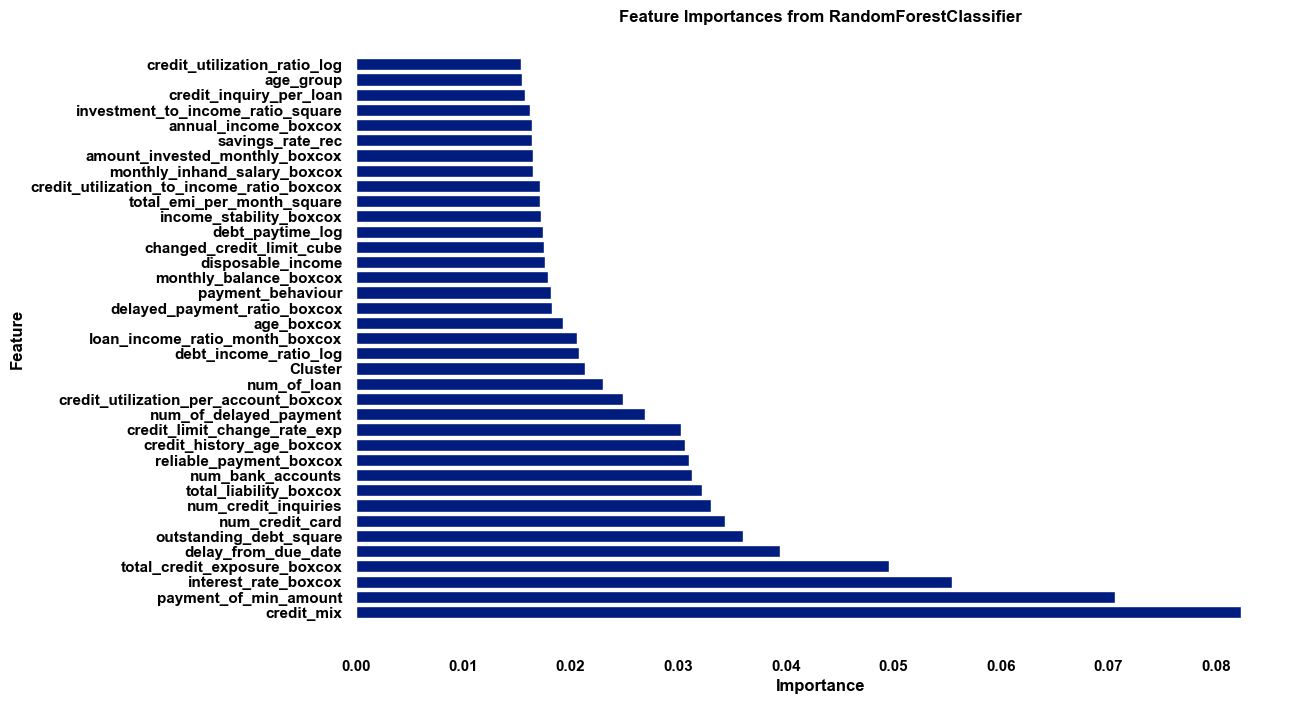

In [52]:
# Get feature importances
feature_importances = ET_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.646
Accuracy Train - 0.6963310715585712

Precision Test  - 0.6918951853930027
Precision Train - 0.6956021906685568

Recall Test  - 0.646
Recall Train - 0.6963310715585712

F1_score Test  - 0.6494025369924875
F1_score Train - 0.6941559753295288

Confusion Matrix Test  -- 
[[5977 1404 1424]
 [3729 8983 3161]
 [ 157  745 4420]]
Confusion Matrix Train -- 
[[24521  5634  5561]
 [ 7570 20624  6728]
 [  954  6089 29462]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      8805
           1       0.81      0.57      0.67     15873
           2       0.49      0.83      0.62      5322

    accuracy                           0.65     30000
   macro avg       0.63      0.69      0.64     30000
weighted avg       0.69      0.65      0.65     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     35716
           1     

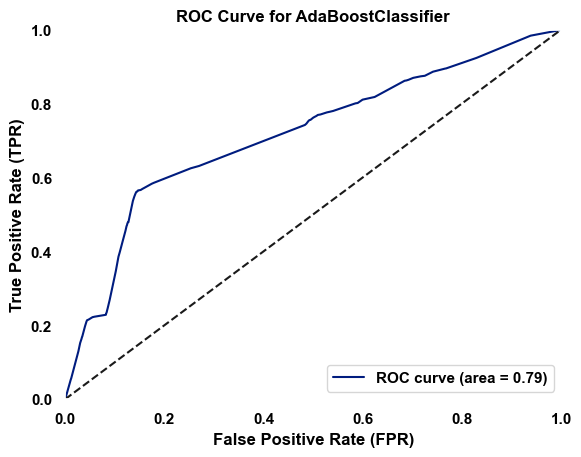

----------------------------------------


In [106]:
ADA_fea = ['credit_mix','num_credit_card','outstanding_debt_square','loan_income_ratio_month_boxcox','interest_rate_boxcox','payment_of_min_amount',
   'payment_behaviour','credit_limit_change_rate_exp','total_credit_exposure_boxcox','delay_from_due_date','credit_inquiry_per_loan']

ADA_Classifier =AdaBoostClassifier(algorithm='SAMME',random_state=42,)
evaluate_model(ADA_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)


                           Feature  Importance
0                       credit_mix      0.3020
1                  num_credit_card      0.2368
2          outstanding_debt_square      0.1150
3   loan_income_ratio_month_boxcox      0.0671
4             interest_rate_boxcox      0.0635
8     total_credit_exposure_boxcox      0.0553
6                payment_behaviour      0.0428
5            payment_of_min_amount      0.0414
9              delay_from_due_date      0.0300
10         credit_inquiry_per_loan      0.0236
7     credit_limit_change_rate_exp      0.0225


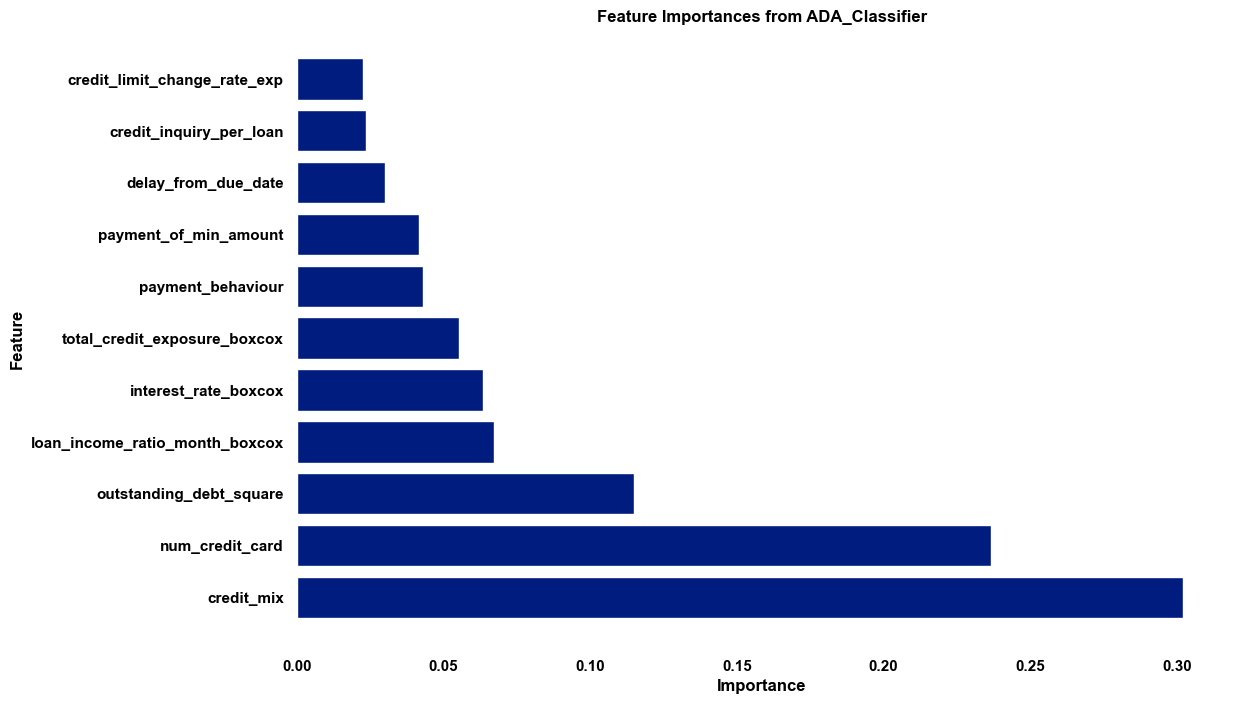

In [54]:
# Get feature importances
feature_importances = ADA_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df[ADA_fea].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ADA_Classifier')
plt.show()

In [107]:
params = {'n_neighbors' : [2,3,4,5,6,7]}

KNN_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')

KNN_grid_model.fit(x_train_scaled_df[new],y_train)




Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................n_neighbors=2;, score=0.730 total time=   2.3s
[CV 2/3] END .....................n_neighbors=2;, score=0.747 total time=   2.3s
[CV 3/3] END .....................n_neighbors=2;, score=0.744 total time=   2.3s
[CV 1/3] END .....................n_neighbors=3;, score=0.748 total time=   2.4s
[CV 2/3] END .....................n_neighbors=3;, score=0.760 total time=   2.4s
[CV 3/3] END .....................n_neighbors=3;, score=0.756 total time=   2.6s
[CV 1/3] END .....................n_neighbors=4;, score=0.736 total time=   2.6s
[CV 2/3] END .....................n_neighbors=4;, score=0.750 total time=   2.6s
[CV 3/3] END .....................n_neighbors=4;, score=0.748 total time=   2.7s
[CV 1/3] END .....................n_neighbors=5;, score=0.734 total time=   2.7s
[CV 2/3] END .....................n_neighbors=5;, score=0.746 total time=   2.8s
[CV 3/3] END .....................n_neighbors=5;,

GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1, param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=3)

In [108]:
KNN_grid_model.best_params_

{'n_neighbors': 3}

Accuracy Test  - 0.6942
Accuracy Train - 0.8788161615784512

Precision Test  - 0.7080164794660212
Precision Train - 0.8789368604305725

Recall Test  - 0.6942
Recall Train - 0.8788161615784512

F1_score Test  - 0.6955387423630842
F1_score Train - 0.8780935235051399

Confusion Matrix Test  -- 
[[ 6701  1748   356]
 [ 3372 10318  2183]
 [  372  1143  3807]]
Confusion Matrix Train -- 
[[32732  2214   770]
 [ 4086 28024  2812]
 [ 1219  1883 33403]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      8805
           1       0.78      0.65      0.71     15873
           2       0.60      0.72      0.65      5322

    accuracy                           0.69     30000
   macro avg       0.67      0.71      0.69     30000
weighted avg       0.71      0.69      0.70     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     35716
      

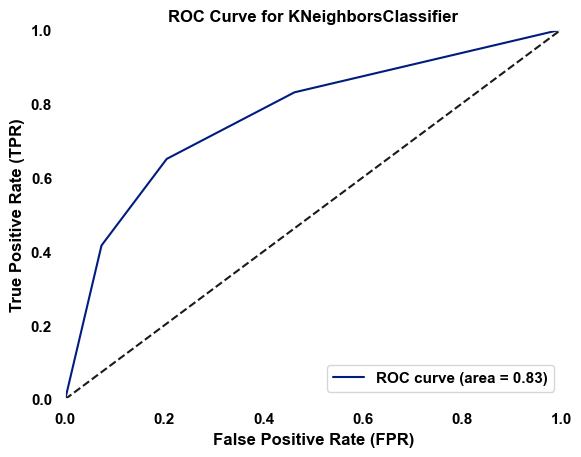

----------------------------------------


In [109]:
xgb_fea = ['credit_mix','outstanding_debt_square','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','payment_behaviour','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log',
    'age_boxcox',]

KN_Classifier = KNeighborsClassifier(n_neighbors=3)
evaluate_model(KN_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [ ]:
imp_fea

In [81]:
RF_Classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' :[1,3,6,9],
    'max_leaf_nodes' :[2,6,12,24]

}
kf=KFold(n_splits=3,shuffle=True,random_state=42)

scorer = make_scorer(f1_score, pos_label='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)


grid_search = GridSearchCV( estimator= RF_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer)
grid_search.fit( x_train_scaled_df[imp_fea], y_train,)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\santhosh\Banking_Analytics\Banking_Analytics\banking\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 20, 'max_leaf_nodes': 24, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
np.unique(y_train)

array([0, 1, 2], dtype=int8)

In [45]:
ET_Classifier =ExtraTreesClassifier(random_state=42,)

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [4, 10],
}

scorer = make_scorer(f1_score, average='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)

ET_grid_search = GridSearchCV( estimator= ET_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer,return_train_score=True)
ET_grid_search.fit( x_train_scaled_df[ET_revised], y_train,)
best_params = ET_grid_search.best_params_
print(best_params)
ET_best = ExtraTreesClassifier(**best_params, random_state=42)
evaluate_model(ET_best, x_train_scaled_df[ET_revised], y_train, x_test_scaled_df[ET_revised], y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Accuracy Test  - 0.7064666666666667
Accuracy Train - 0.7867616176511765

Precision Test  - 0.7477916713442011
Precision Train - 0.7863151302135977

Recall Test  - 0.7064666666666667
Recall Train - 0.7867616176511765

F1_score Test  - 0.7086824047290619
F1_score Train - 0.7841238225348406

Confusion Matrix Test  -- 
[[7132  790  883]
 [3346 9676 2851]
 [ 151  785 4386]]
Confusion Matrix Train -- 
[[30095  2331  3290]
 [ 6036 22885  6001]
 [  764  4425 31316]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      8805
           1       0.86      0.61      0.71     15873
           2       0.54      0.82      0.65      5322

    accuracy                           0.71     30000
   macro avg       0.69      0.75      0.70     30000
weighted avg       0.75      0.71      0.71     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.82      0.84      0.83  

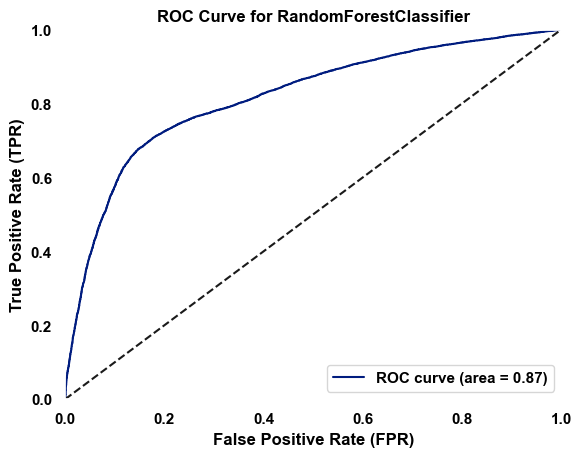

----------------------------------------


In [122]:

RF_Classifier = RandomForestClassifier(n_estimators=300,max_depth=12,random_state=42)
evaluate_model(RF_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [43]:
ET_revised = ['age_boxcox', 'interest_rate_boxcox', 'outstanding_debt_square',
       'credit_history_age_boxcox', 'credit_limit_change_rate_exp',
       'debt_income_ratio_log', 'loan_income_ratio_month_boxcox',
       'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox',
       'total_credit_exposure_boxcox',
       'credit_utilization_to_income_ratio_boxcox', 'total_liability_boxcox',
       'num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_credit_inquiries', 'num_of_delayed_payment',
       'credit_mix', 'payment_of_min_amount']
# ['interest_rate_boxcox', 'outstanding_debt_square',
#        'credit_history_age_boxcox', 'credit_limit_change_rate_exp',
#        'loan_income_ratio_month_boxcox', 'reliable_payment_boxcox',
#        'total_credit_exposure_boxcox',
#        'credit_utilization_to_income_ratio_boxcox', 'total_liability_boxcox',
#        'num_bank_accounts', 'num_credit_card', 'delay_from_due_date',
#        'num_credit_inquiries', 'credit_mix', 'payment_of_min_amount']

Accuracy Test  - 0.8048333333333333
Accuracy Train - 0.9999813333582221

Precision Test  - 0.807310729983535
Precision Train - 0.9999813344034162

Recall Test  - 0.8048333333333333
Recall Train - 0.9999813333582221

F1_score Test  - 0.8051655391317277
F1_score Train - 0.9999813333522585

Confusion Matrix Test  -- 
[[ 7404  1300   101]
 [ 1961 12501  1411]
 [   16  1066  4240]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    2 34920     0]
 [    0     0 36504]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      8805
           1       0.84      0.79      0.81     15873
           2       0.74      0.80      0.77      5322

    accuracy                           0.80     30000
   macro avg       0.79      0.81      0.80     30000
weighted avg       0.81      0.80      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00    

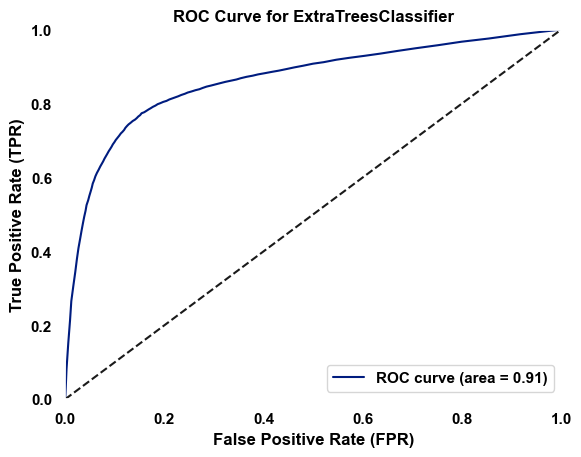

----------------------------------------


{'max_depth': 10,
 'max_leaf_nodes': 32,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [44]:
ET_Classifier =ExtraTreesClassifier(random_state=42)
evaluate_model(ET_Classifier,  x_train_scaled_df[ET_revised], y_train, x_test_scaled_df[ET_revised], y_test)

{'max_depth': 10, 'max_leaf_nodes': 32, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [55]:
params = {
   # 'gamma': [0, 0.3, 0.5],
    'learning_rate': [0.4, 0.1,0.2,0.3],
    'max_depth': [ 5, 7,10],
    'min_child_weight': [3, 5, 1],
}


In [56]:
xgb_Classifier = xg.XGBClassifier(random_state=42)


scorer = make_scorer(f1_score, average='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)

xgb_grid_search = GridSearchCV( estimator= xgb_Classifier, param_grid=params, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer)
xgb_grid_search.fit( x_train_scaled_df[imp_fea], y_train,)
xgb_best_params = xgb_grid_search.best_params_
print(xgb_best_params)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=3; total time=   6.9s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=5; total time=   6.9s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=5; total time=   7.0s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=1; total time=   7.0s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=3; total time=   7.1s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=1; total time=   7.1s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=3; total time=   7.2s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=5; total time=   7.2s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=1; total time=   7.8s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=5; total time=  11.5s[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=5; total time=  11.4s

[CV] END .learning_rate=0.4, max_depth=7, min_c

Accuracy Test  - 0.7365666666666667
Accuracy Train - 0.8408367482194363

Precision Test  - 0.7584528761177407
Precision Train - 0.8406429575721104

Recall Test  - 0.7365666666666667
Recall Train - 0.8408367482194363

F1_score Test  - 0.738301677330553
F1_score Train - 0.8391330482639647

Confusion Matrix Test  -- 
[[ 7143  1090   572]
 [ 2880 10638  2355]
 [  109   897  4316]]
Confusion Matrix Train -- 
[[31308  2248  2154]
 [ 4813 25629  4473]
 [  476  2887 33141]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      8805
           1       0.84      0.67      0.75     15873
           2       0.60      0.81      0.69      5322

    accuracy                           0.74     30000
   macro avg       0.71      0.76      0.73     30000
weighted avg       0.76      0.74      0.74     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.88    

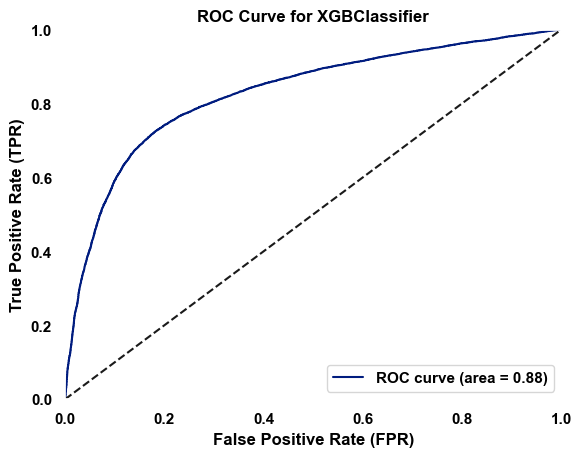

----------------------------------------


In [57]:
xgb = ['monthly_inhand_salary_boxcox', 'interest_rate_boxcox',
       'outstanding_debt_square', 'credit_utilization_ratio_log',
       'credit_limit_change_rate_exp', 'loan_income_ratio_month_boxcox',
       'total_credit_exposure_boxcox', 'total_liability_boxcox',
       'num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_credit_inquiries', 'num_of_delayed_payment',
       'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'age_group',
       'Cluster', 'credit_inquiry_per_loan']
xgb_Classifier = xg.XGBClassifier(random_state=42)
evaluate_model(xgb_Classifier, x_train[xgb_fea], y_train, x_test[xgb_fea], y_test)

In [24]:
SVC = svm.SVC()
evaluate_model(SVC, x_train[new], y_train, x_test[new], y_test)

Accuracy Test  - 0.6438666666666667
Accuracy Train - 0.7084363887514816

Precision Test  - 0.69703948205466
Precision Train - 0.7062292963291885

Recall Test  - 0.6438666666666667
Recall Train - 0.7084363887514816

F1_score Test  - 0.6463212796794663
F1_score Train - 0.7045620027275036

Confusion Matrix Test  -- 
[[6672  830 1303]
 [4098 8534 3241]
 [ 165 1047 4110]]
Confusion Matrix Train -- 
[[27265  3169  5282]
 [ 8508 19470  6944]
 [  964  6372 29169]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      8805
           1       0.82      0.54      0.65     15873
           2       0.47      0.77      0.59      5322

    accuracy                           0.64     30000
   macro avg       0.63      0.69      0.64     30000
weighted avg       0.70      0.64      0.65     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.74      0.76      0.75    

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, loguniform

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[new])
x_test_scaled = scaler.transform(x_test[new])

# Define the parameter space
param_distributions = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e0),
    'kernel': ['rbf', 'poly']
}

# Create base SVM classifier
svm_clf = SVC(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm_clf, 
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(x_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best estimator for final evaluation
best_svm = random_search.best_estimator_
evaluate_model(best_svm, x_train_scaled, y_train, x_test_scaled, y_test)

NameError: name 'x_train' is not defined

In [41]:
from sklearn.feature_selection import RFE

ET_Classifier =ExtraTreesClassifier(random_state=42,)

selector=RFE(ET_Classifier,n_features_to_select=20, step=1)
selector=selector.fit(x_train_scaled_df,y_train)
selected_features_mask = selector.get_support()
selected_features = x_train_scaled_df.columns[selected_features_mask]
print(selected_features)


Index(['age_boxcox', 'interest_rate_boxcox', 'outstanding_debt_square',
       'credit_history_age_boxcox', 'credit_limit_change_rate_exp',
       'debt_income_ratio_log', 'loan_income_ratio_month_boxcox',
       'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox',
       'total_credit_exposure_boxcox',
       'credit_utilization_to_income_ratio_boxcox', 'total_liability_boxcox',
       'num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_credit_inquiries', 'num_of_delayed_payment',
       'credit_mix', 'payment_of_min_amount'],
      dtype='object')


In [39]:
xgb_Classifier =xg.XGBClassifier(random_state=42,)

selector=RFE(xgb_Classifier,n_features_to_select=20, step=1)
selector=selector.fit(x_train_scaled_df,y_train)
selected_features_mask = selector.get_support()
selected_features = x_train_scaled_df.columns[selected_features_mask]
print(selected_features)


Index(['monthly_inhand_salary_boxcox', 'interest_rate_boxcox',
       'outstanding_debt_square', 'credit_utilization_ratio_log',
       'credit_limit_change_rate_exp', 'loan_income_ratio_month_boxcox',
       'total_credit_exposure_boxcox', 'total_liability_boxcox',
       'num_bank_accounts', 'num_credit_card', 'num_of_loan',
       'delay_from_due_date', 'num_credit_inquiries', 'num_of_delayed_payment',
       'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'age_group',
       'Cluster', 'credit_inquiry_per_loan'],
      dtype='object')
